##Visão Computacional & Deep Learning

Aqui vamos ilustrar como o implementamos uma rede convolucional utilizando a sua webcam para a coleta de imagens

#Captura da Webcam
No trecho abaixo implementos o código para capturar da sua câmera via browser.

É muito importante que voce libere o acesso a camera quando solicitado!

In [1]:

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(quality=1.0,save_path='diretorio'):
  js = Javascript('''
    async function takePhoto(params) {
      const div = document.createElement('div');
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      var quality = params[0]
      // show the video in the HTML element
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // prints the logs to cell
      let jsLog = function(abc) {
        document.querySelector("#output-area").appendChild(document.createTextNode(`${abc}... `));
      }

      // Wait for Capture to be clicked.
      // await new Promise((resolve) => capture.onclick = resolve);

      for (let i = 0; i < 50; i++) {
        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        img = canvas.toDataURL('image/jpeg', quality);

        // show each captured image
        // let imgTag = document.createElement('img');
        // imgTag.src = img;
        // div.appendChild(imgTag);


        // Call a python function and send this image
        google.colab.kernel.invokeFunction('notebook.capture', [img,params[1] + i], {});
        jsLog(i)

        // wait for X miliseconds second, before next capture
        await new Promise(resolve => setTimeout(resolve, 50));
      }

      stream.getVideoTracks()[0].stop(); // stop video stream
    }
    ''')

  display(js) # make the provided HTML, part of the cell
  data = eval_js('takePhoto({})'.format([quality,save_path])) # call the takePhoto() JavaScript function


In [2]:
#Algumas funções auxiliares para conversão do buffer de imagens
import IPython
from google.colab import output
from google.colab.patches import cv2_imshow

import time
import sys
import numpy as np
import cv2

from PIL import Image
from io import BytesIO
import base64
import logging

def data_uri_to_img(uri):
  """convert base64image to numpy array"""
  try:
    image = base64.b64decode(uri.split(',')[1], validate=True)
    # make the binary image, a PIL image
    image = Image.open(BytesIO(image))
    # convert to numpy array
    image = np.array(image, dtype=np.uint8);
    return image
  except Exception as e:
    logging.exception(e);print('\n')
    return None

def capture(imgB64,save_path):
  """
  in Colab, run_algo function gets invoked by the JavaScript, that sends N images every second

  params:
    image: image
  """
  image = data_uri_to_img(imgB64)
  print("Processing {}".format(save_path), flush=True)
  if image is None:
    print("At run_algo(): image is None.")
    return

  try:

    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(128,128))
    cv2.imwrite(save_path + '.png',image)

  except Exception as e:
    logging.exception(e)
    print('\n')

# register this function, so JS code could call this
output.register_callback('notebook.capture', capture)



Escolha dois objetos a sua volta e defina abaixo. Por exemplo, um caderno e um teclado

In [5]:
#Defina aqui quais objetos voce quer reconhecer

obj1 = 'celular'
obj2 = 'caderno'

#Captura
A seguir vamos capturar cada objeto. Pegue um objeto (caderno) e aponte para a camera e então execute a celula.

É importante que o objeto fique bem próximo a camera, ocupando a maior parte da imagem.

A camera ira coletar 50 imagens e processar. Pode demorar uns minutinhos!

In [6]:
!rm -rf images
dir = './images/' + obj1
!mkdir -p $dir
path = dir + '/img-'
take_photo(quality=1.0, save_path=path)

print("Pronto...");

<IPython.core.display.Javascript object>

Pronto...
Processing ./images/celular/img-0
Processing ./images/celular/img-1
Processing ./images/celular/img-2
Processing ./images/celular/img-3
Processing ./images/celular/img-4
Processing ./images/celular/img-5
Processing ./images/celular/img-6
Processing ./images/celular/img-7
Processing ./images/celular/img-8
Processing ./images/celular/img-9
Processing ./images/celular/img-10
Processing ./images/celular/img-11
Processing ./images/celular/img-12
Processing ./images/celular/img-13
Processing ./images/celular/img-14
Processing ./images/celular/img-15
Processing ./images/celular/img-16
Processing ./images/celular/img-17
Processing ./images/celular/img-18
Processing ./images/celular/img-19
Processing ./images/celular/img-20
Processing ./images/celular/img-21
Processing ./images/celular/img-22
Processing ./images/celular/img-23
Processing ./images/celular/img-24
Processing ./images/celular/img-25
Processing ./images/celular/img-26
Processing ./images/celular/img-27
Processing ./images/

#Agora repita o processo para o segundo objeto (teclado)

In [7]:
dir = './images/' + obj2
!mkdir -p $dir
path = dir + '/img-'
take_photo(quality=1.0, save_path=path)
print("Pronto...");

<IPython.core.display.Javascript object>

Pronto...
Processing ./images/caderno/img-0
Processing ./images/caderno/img-1
Processing ./images/caderno/img-2
Processing ./images/caderno/img-3
Processing ./images/caderno/img-4
Processing ./images/caderno/img-5
Processing ./images/caderno/img-6
Processing ./images/caderno/img-7
Processing ./images/caderno/img-8
Processing ./images/caderno/img-9
Processing ./images/caderno/img-10
Processing ./images/caderno/img-11
Processing ./images/caderno/img-12
Processing ./images/caderno/img-13
Processing ./images/caderno/img-14
Processing ./images/caderno/img-15
Processing ./images/caderno/img-16
Processing ./images/caderno/img-17
Processing ./images/caderno/img-18
Processing ./images/caderno/img-19
Processing ./images/caderno/img-20
Processing ./images/caderno/img-21
Processing ./images/caderno/img-22
Processing ./images/caderno/img-23
Processing ./images/caderno/img-24
Processing ./images/caderno/img-25
Processing ./images/caderno/img-26
Processing ./images/caderno/img-27
Processing ./images/

Por fim, escolha uma cena de fundo, sem objeto nenhum. Não tem problema se voce estiver em frente a camera. Você sera parte do cenário de fundo.



In [8]:
dir = './images/fundo/'
!mkdir -p $dir
path = dir + '/img-'
take_photo(quality=1.0, save_path=path)
print("Pronto...");

<IPython.core.display.Javascript object>

Pronto...
Processing ./images/fundo//img-0
Processing ./images/fundo//img-1
Processing ./images/fundo//img-2
Processing ./images/fundo//img-3
Processing ./images/fundo//img-4
Processing ./images/fundo//img-5
Processing ./images/fundo//img-6
Processing ./images/fundo//img-7
Processing ./images/fundo//img-8
Processing ./images/fundo//img-9
Processing ./images/fundo//img-10
Processing ./images/fundo//img-11
Processing ./images/fundo//img-12
Processing ./images/fundo//img-13
Processing ./images/fundo//img-14
Processing ./images/fundo//img-15
Processing ./images/fundo//img-16
Processing ./images/fundo//img-17
Processing ./images/fundo//img-18
Processing ./images/fundo//img-19
Processing ./images/fundo//img-20
Processing ./images/fundo//img-21
Processing ./images/fundo//img-22
Processing ./images/fundo//img-23
Processing ./images/fundo//img-24
Processing ./images/fundo//img-25
Processing ./images/fundo//img-26
Processing ./images/fundo//img-27
Processing ./images/fundo//img-28
Processing ./i

#Carregar as imagens e treinar o modelo

Abaixo importamos algumas bibliotecas

In [9]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Carregamos as imagens de exemplo e definimos os labels(classes)

In [10]:
import os

imgs = []
labels = []

def read_img(path):
  img = cv2.imread(path)
  img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
  img = cv2.resize(img,(64,64))
  return img

dir='./images/' + obj1 + '/'
for filename in os.listdir(dir):
  img = read_img(dir + filename)
  imgs.append(img)
  labels.append(0)

dir='./images/' + obj2 + '/'
for filename in os.listdir(dir):
  img = read_img(dir + filename)
  imgs.append(img)
  labels.append(1)

dir='./images/fundo/'
for filename in os.listdir(dir):
  img = read_img(dir + filename)
  imgs.append(img)
  labels.append(2)

imgs = np.array(imgs)
labels = np.array(labels)

print(imgs.shape, labels.shape)

(150, 64, 64, 3) (150,)


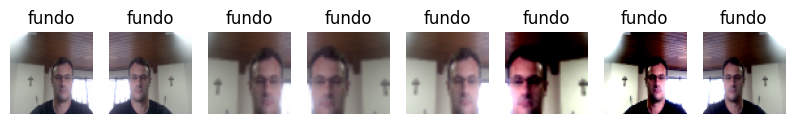

In [11]:
from sklearn.utils import shuffle
import numpy as np
import random
imgs, labels = shuffle(imgs, labels, random_state=0)

#fazer data aug
import matplotlib.pyplot as plt
class_names = [obj1,obj2,'fundo']


def random_brightness(img):
  brightness = random.randint(-50, 50)
  contrast = random.randint(30, 200)
  dummy = np.int16(img)
  dummy = dummy * (contrast/127+1) - contrast + brightness
  dummy = np.clip(dummy, 0, 255)
  img = np.uint8(dummy)
  return img

def random_zoom(img):
  height, width = img.shape[0], img.shape[1]
  x = random.randint(5,15)
  y = random.randint(5,15)
  cropped = img[y:height-y, x:width-x]
  resized = cv2.resize(cropped, (img.shape[1], img.shape[0]))
  return resized

def data_aug(img):
  aug = []
  ftype = random.randint(0,1)
  flip = cv2.flip(img,ftype)
  zoom1 = random_zoom(img)
  zoom2 = random_zoom(flip)
  aug.append(flip)
  aug.append(zoom1)
  aug.append(zoom2)
  aug.append(random_brightness(zoom1))
  aug.append(random_brightness(zoom2))
  aug.append(random_brightness(img))
  aug.append(random_brightness(flip))

  return aug

aug = data_aug(imgs[0])

tam = len(aug)
plt.figure(figsize=(10, 10))
ax = plt.subplot(1, tam+1, 1)
plt.imshow(imgs[0])
plt.title(class_names[labels[0]])
plt.axis("off")
for i in range(tam):
  ax = plt.subplot(1, tam+1, i + 2)
  plt.imshow(aug[i])
  plt.title(class_names[labels[0]])
  plt.axis("off")


(1200, 64, 64, 3)
(1200,)


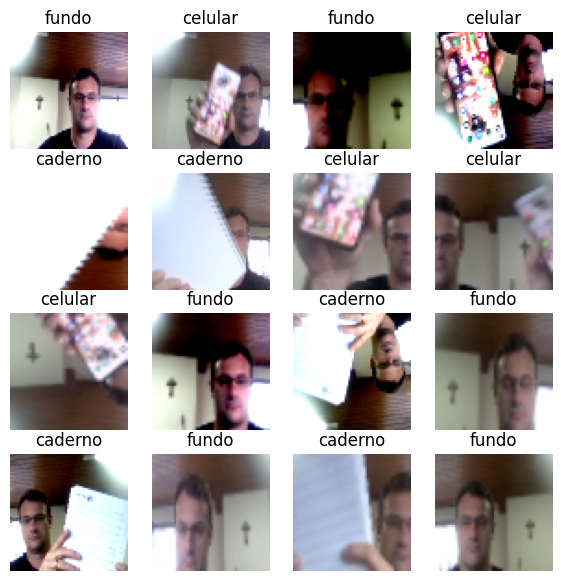

In [12]:
aug_data = []
aug_labels = []
for img,lbl in zip(imgs,labels):


    aug_data.append(img)
    aug_labels.append(lbl)

    aug = data_aug(img)
    for a in aug:
      aug_data.append(a)
      aug_labels.append(lbl)

aug_data = np.array(aug_data)
aug_labels = np.array(aug_labels)

print(aug_data.shape)
print(aug_labels.shape)

aug_data, aug_labels = shuffle(aug_data, aug_labels, random_state=0)

plt.figure(figsize=(7, 7))
for i in range(16):
  ax = plt.subplot(4, 4, i+1)
  plt.imshow(aug_data[i])
  plt.title(class_names[aug_labels[i]])
  plt.axis("off")

#Fração de Treinamento e Teste

In [13]:
t = int(len(aug_data) * 0.8)
train_x,train_y = aug_data[:t], aug_labels[:t]
test_x,test_y = aug_data[t:], aug_labels[t:]

print(train_x.shape,test_x.shape)

n,c = np.unique(train_y,return_counts=True)
print(n,c)

(960, 64, 64, 3) (240, 64, 64, 3)
[0 1 2] [307 327 326]


#Defino o Modelo Convolucional (CNN)

In [14]:
n_classes = len(class_names)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(n_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        18464     
                                                                 
 flatten (Flatten)           (None, 4608)              0

#Treinamento

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=15,
                    validation_data=(test_x, test_y))

Epoch 1/15
30/30 [==============================] - 9s 168ms/step - loss: 8.9892 - accuracy: 0.5552 - val_loss: 0.4669 - val_accuracy: 0.7792
Epoch 2/15
30/30 [==============================] - 5s 169ms/step - loss: 0.3934 - accuracy: 0.8479 - val_loss: 0.2592 - val_accuracy: 0.9042
Epoch 3/15
30/30 [==============================] - 6s 198ms/step - loss: 0.1943 - accuracy: 0.9323 - val_loss: 0.0858 - val_accuracy: 0.9875
Epoch 4/15
30/30 [==============================] - 5s 152ms/step - loss: 0.0791 - accuracy: 0.9729 - val_loss: 0.0547 - val_accuracy: 0.9875
Epoch 5/15
30/30 [==============================] - 6s 191ms/step - loss: 0.0460 - accuracy: 0.9885 - val_loss: 0.0337 - val_accuracy: 0.9958
Epoch 6/15
30/30 [==============================] - 5s 174ms/step - loss: 0.0866 - accuracy: 0.9688 - val_loss: 0.0467 - val_accuracy: 0.9875
Epoch 7/15
30/30 [==============================] - 5s 153ms/step - loss: 0.0574 - accuracy: 0.9812 - val_loss: 0.0649 - val_accuracy: 0.9750
Epoch 

#Testando o modelo
Abra sua camera e apresente os modelos para verificar se identificamos

In [16]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [17]:
def draw_results(result,draw_image):

  for i in range(len(class_names)):
    bar_w = int(500 * result[i])
    cls = class_names[i]
    cv2.putText(draw_image, cls, (10, 20*(i+1)), 3, 0.6, [255, 255, 255], thickness=2)
    cv2.putText(draw_image, cls, (10, 20*(i+1)), 3, 0.6, [0, 0, 0], thickness=1)

    cv2.rectangle(draw_image, (100,20*(i+1)), (100+bar_w, 20*(i+1)), [255, 255, 255], thickness=4)
    cv2.rectangle(draw_image, (100,20*(i+1)), (100+bar_w, 20*(i+1)), [0, 0, 255], thickness=3)


In [21]:
# start streaming video from webcam
video_stream()

# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
     # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)
    img = cv2.resize(img,(64,64))
    img = np.expand_dims(img,axis=0)
    result = model.predict(img,batch_size=1)

    draw_results(result[0],bbox_array)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 20ms/step


KeyboardInterrupt: ignored